# Machine Learning Essentials SS25 - Exercise Sheet 3

## Instructions
- `TODO`'s indicate where you need to complete the implementations.
- You may use external resources, but <b>write your own solutions</b>.
- Provide concise, but comprehensible comments to explain what your code does.
- Code that's unnecessarily extensive and/or not well commented will not be scored.

## Exercise 3

## Task 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# TODO: Define network parameters
# Hidden layer
W1 = np.array([[8, -4], [-4, 8]]) 
b1 = np.array([-6, -6])
# Output layer
w2 = np.array([1, 1])
b2 = np.array([-.5])

class XORNetwork:
    def __init__(self, W1, b1, w2, b2):
        self.W1 = W1
        self.b1 = b1
        self.w2 = w2
        self.b2 = b2

    # TODO: Implement the forward pass (& activation) of the two-layer network
    # Define sigmoid activation function
    def forward(self, x):
        """
        Forward pass through the network. Returns hidden layer activations and output.
        """
        sigmoid = lambda x: 1 / (1 + np.exp(-x))

        phi = sigmoid(W1@x + b1)
        output = sigmoid(w2.T@phi + b2)

        return output, phi

### Task 3

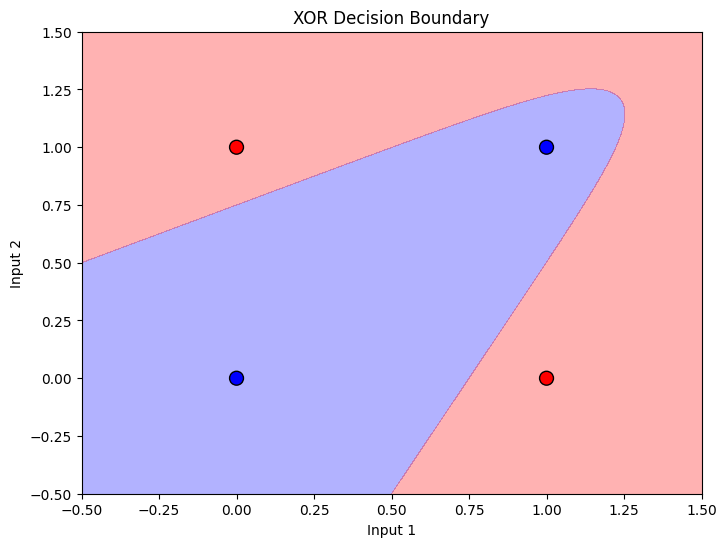

In [11]:
# TODO: Create XOR dataset, compute outputs & visualize decision boundary
# hard-coded XOR
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]]).T
y = np.array([[0], [1], [1], [0]]).T


network = XORNetwork(W1, b1, w2, b2)

# Plot the decision boundary

# create a grid
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 200), np.linspace(-0.5, 1.5, 200))
grid = np.vstack([xx.ravel(), yy.ravel()])

Z = np.array([network.forward(grid[:, i])[0] for i in range(grid.shape[1])])
Z = Z.reshape(xx.shape)

# plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3, colors=('blue', 'red'))
plt.scatter(x[0, :], x[1, :], c=y.ravel(), cmap='bwr', edgecolors='k', s=100)
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.title('XOR Decision Boundary')
plt.show()


### Task 5

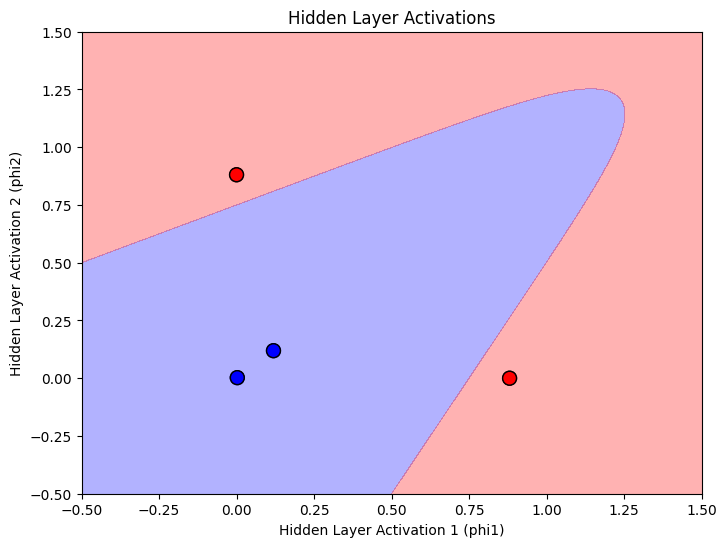

In [15]:
# TODO: (a) Compute hidden layer activations
hidden_act = np.array([network.forward(x[:, i])[1] for i in range(x.shape[1])])


# TODO: (b) Create scatter plot in the (phi1, phi2) plane, coloring points by their label
plt.figure(figsize=(8, 6))
plt.scatter(hidden_act[:, 0], hidden_act[:, 1], c=y.ravel(), cmap='bwr', edgecolors='k', s=100)
plt.xlabel('Hidden Layer Activation 1 (phi1)')
plt.ylabel('Hidden Layer Activation 2 (phi2)')
plt.title('Hidden Layer Activations')



# TODO: (c) Draw the output layer's decision boundary in the (phi1, phi2) space
xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 200), np.linspace(-0.5, 1.5, 200))
grid = np.vstack([xx.ravel(), yy.ravel()])

Z = np.array([network.forward(grid[:, i])[0] for i in range(grid.shape[1])])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, levels=[0, 0.5, 1], alpha=0.3, colors=('blue', 'red'))
plt.scatter(hidden_act[:, 0], hidden_act[:, 1], c=y.ravel(), cmap='bwr', edgecolors='k', s=100)

plt.show()

(d) In the graphic above on can see that the hidden layer performs a transformation that makes the two classes linearly separable again. That way, the last layer, constituting a single layer logistic regression in this transformed hidden layer space, can perform the classification successfully. 